# MNIST-Datensatz
Der MNIST-Datensatz (Modified National Institute of Standards and Technology) ist ein berühmter Datensatz in der Welt der maschinellen Lernens. Er besteht aus handgeschriebenen Ziffern, die in einem Bildformat von 28x28 Pixeln gespeichert sind. Der Datensatz ist ideal, um grundlegende Klassifikationsaufgaben zu üben und zu verstehen, wie neuronale Netzwerke funktionieren. In dieser Analyse werden wir den MNIST-Datensatz laden, untersuchen, visualisieren und schließlich ein Mehrschichtiges Perzeptron (MLP) trainieren, um die Ziffern zu klassifizieren.

## Notwendige Bibliotheken
Zuerst installieren wir die schon bekannten Bibliotheken `scikit-learn`, `pandas`, etc.

In [ ]:
%pip install matplotlib seaborn pandas scikit-learn numpy

## Laden der Daten


Zunächst müssen wir die notwendigen Bibliotheken importieren und den MNIST-Datensatz laden. Wir verwenden dafür `scikit-learn`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# MNIST-Datensatz laden
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target'].astype(int)

# Nur 5000 Bilder auswählen
sample_size = 5000
indices = np.random.choice(len(X), sample_size, replace=False)
X_sampled, y_sampled = X[indices], y[indices]

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/qualities/554. Retrying...
  warn(


## Analyse des Datensatzes
Der MNIST-Datensatz besteht aus 70.000 Bildern von handgeschriebenen Ziffern, wobei 60.000 Bilder für das Training und 10.000 Bilder für das Testen verwendet werden. Jedes Bild ist 28x28 Pixel groß, also 784 Pixel insgesamt.

Wir können die Dimensionen der Trainings- und Testdaten wie folgt überprüfen:

**Aufgabe:** Wie viele Neuronen hat die Eigabeschicht, basierend auf der Ausgabe dieser Zelle.

In [ ]:
anzahl_bilder_training = X_train.shape[0]
anzahl_training_pixel = X_train.shape[1]
anzahl_bilder_test = X_test.shape[0]
anzahl_test_pixel = X_test.shape[1]
print(f"Trainingsdaten: {anzahl_bilder_training} Bilder, jedes Bild hat {anzahl_training_pixel} Pixel")
print(f"Testdaten: {anzahl_bilder_test} Bilder, jedes Bild hat {anzahl_test_pixel} Pixel")

Trainingsdaten: 56000 Bilder, jedes Bild hat 784 Pixel
Testdaten: 14000 Bilder, jedes Bild hat 784 Pixel


Um ein besseres Verständnis für die Daten zu bekommen, ist es hilfreich, einige Bilder zu visualisieren. Dazu verwenden wir `matplotlib`.

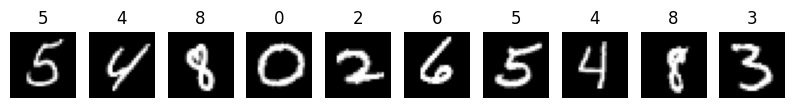

In [ ]:
# Funktion zum Anzeigen von Bildern
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Zeige einige Bilder
plot_images(X_train.to_numpy(), y_train.to_numpy())

Zunächst betrachten wir die Verteilung der verschiedenen Ziffern im Datensatz. Dies gibt uns einen Überblick darüber, ob der Datensatz ausgewogen ist oder ob bestimmte Ziffern häufiger vorkommen.

**Aufgabe**: Analysiere die Verteilung der Ziffern im Trainingsdatensatz
- Was fällt dir auf?
- Können wir den gegebenen Datensatz nutzen um eine KI zu trainieren?

<ipython-input-17-74ac0e864923>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


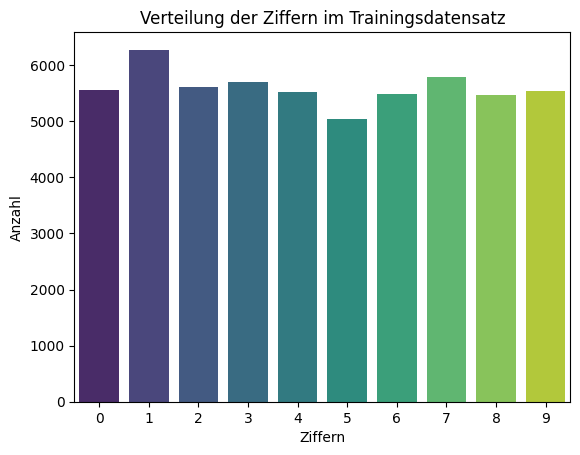

In [ ]:
# Zählung der Klassen
sns.countplot(x=y_train, palette="viridis")
plt.title("Verteilung der Ziffern im Trainingsdatensatz")
plt.xlabel("Ziffern")
plt.ylabel("Anzahl")
plt.show()

Wir können die durchschnittlichen Bilder jeder Ziffer berechnen und visualisieren, um zu sehen, ob es charakteristische Muster gibt.

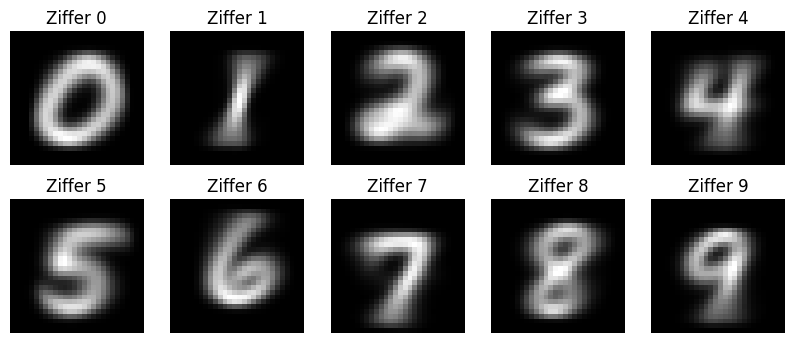

In [ ]:
# Durchschnittliche Bilder pro Ziffer berechnen
average_images = np.zeros((10, 784))
for i in range(10):
    average_images[i] = X_train[y_train == i].mean(axis=0)

# Funktion zum Anzeigen der durchschnittlichen Bilder
def plot_average_images(images):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Ziffer {i}')
        plt.axis('off')
    plt.show()

# Zeige durchschnittliche Bilder
plot_average_images(average_images)

## Trainierung eines MLP Modells
Nun trainieren wir ein Mehrschichtiges Perzeptron (MLP), um die Ziffern zu klassifizieren. Ein MLP ist ein neuronales Netzwerk mit mehreren Schichten, das zur Klassifizierung von Bildern verwendet wird.

Wir verwenden zuerst ein MLP mit 2 hidden layers mit jeweils 64 und 32 Neuronen.

Iteration 1, loss = 3.24117440
Iteration 2, loss = 0.71876981
Iteration 3, loss = 0.46393559
Iteration 4, loss = 0.35503975
Iteration 5, loss = 0.29572295
Iteration 6, loss = 0.25126064
Iteration 7, loss = 0.22199390
Iteration 8, loss = 0.20399426
Iteration 9, loss = 0.17999497
Iteration 10, loss = 0.16549784
Iteration 11, loss = 0.15185653
Iteration 12, loss = 0.14204827
Iteration 13, loss = 0.13279469
Iteration 14, loss = 0.12758372
Iteration 15, loss = 0.11738750
Iteration 16, loss = 0.10849094
Iteration 17, loss = 0.10151803
Iteration 18, loss = 0.10119554
Iteration 19, loss = 0.09204963
Iteration 20, loss = 0.08664692


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


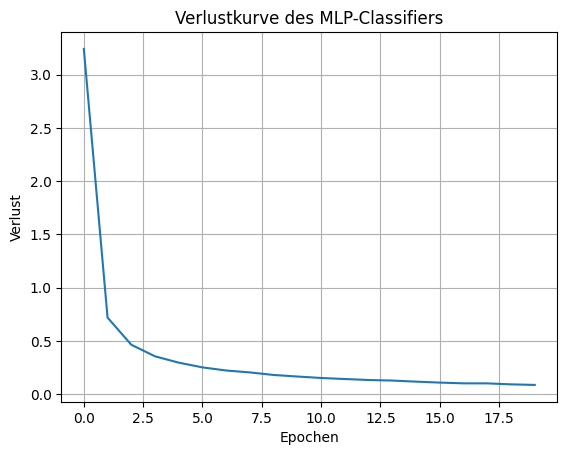

In [ ]:
# MLP-Classifier initialisieren
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=20, alpha=0.001, random_state=42, verbose=True)

# Modell trainieren
mlp.fit(X_train, y_train)

# Verlustkurve plotten
plt.plot(mlp.loss_curve_)
plt.title('Verlustkurve des MLP-Classifiers')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.grid(True)
plt.show()

## Analyse der Genauigkeit des trainierten Modells
Wir bewerten nun die Genauigkeit unseres MLP-Modells mithilfe der Testdaten.

### Konfusionsmatrix

Die visuelle Konfusionsmatrix ist wie ein großes Tabellenbild, das zeigt, wie gut unser Modell arbeitet. In diesem Bild sehen wir:

- **Zeilen**: Die echten Klassen oder Kategorien.
- **Spalten**: Die von unserem Modell vorhergesagten Klassen.

Jede Zelle in der Tabelle zeigt, wie oft unser Modell eine bestimmte Klasse korrekt oder falsch vorhergesagt hat. Die Farben in der Tabelle helfen dabei, schnell zu erkennen, wo das Modell gut ist und wo es Schwierigkeiten hat. Dunklere Farben bedeuten mehr Vorhersagen. Ideal ist es, wenn alle Werte in der Hauptdiagonalen (von oben links nach unten rechts) liegen, was bedeutet, dass unser Modell in den meisten Fällen richtig liegt.

**Aufgabe: Bewerte die Genauigkeit des Modells**
- Wie genau ist das Modell?
- In welchen Bereichen hat das Modell Falschvorhersagen getroffen?

**Extraufgabe: Recherchiere die Begriffe Precision, Recall und F1-Score:**
- Was bedeuten diese Metriken?
- Werte die Metriken bei dem MNIST-Modell aus

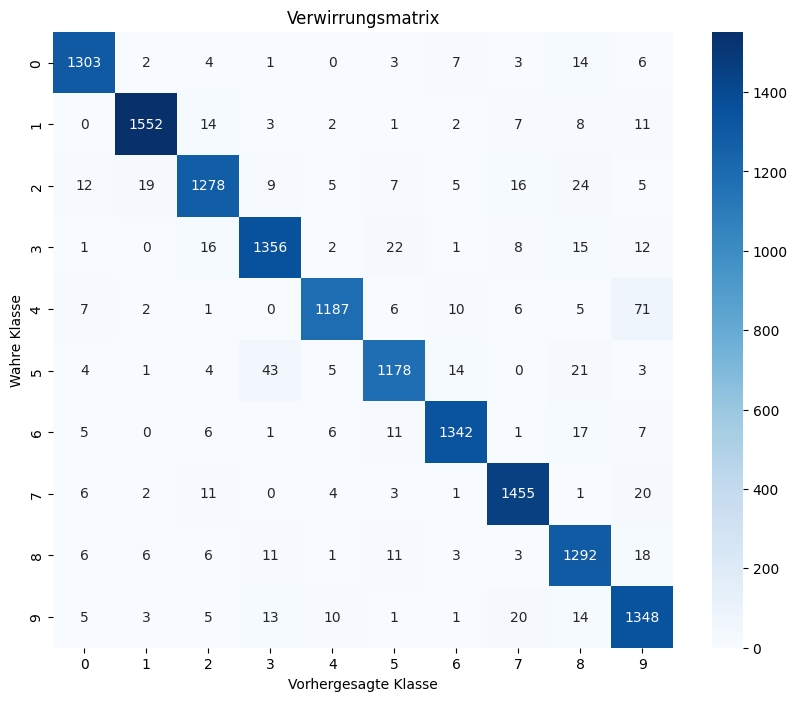

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.98      0.97      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.94      0.95      0.94      1433
           4       0.97      0.92      0.94      1295
           5       0.95      0.93      0.94      1273
           6       0.97      0.96      0.96      1396
           7       0.96      0.97      0.96      1503
           8       0.92      0.95      0.93      1357
           9       0.90      0.95      0.92      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [ ]:
# Vorhersagen auf Testdaten
y_pred = mlp.predict(X_test)

# Verwirrungsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Wahre Klasse')
plt.title('Verwirrungsmatrix')
plt.show()

# Klassifikationsbericht
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])
print("Klassifikationsbericht:\n", report)

## Netztopologie

Die Struktur, also die Anzahl der Knoten pro Schicht, und die Anzahl der Schichten eines MLP wird auch als _Topologie_ bezeichnet.

Sowohl die Tiefe als auch die Anzahl der Knoten kann große Auswirkungen auf die Performanz eines MLP haben. Nachdem du die folgende Zelle ausführst, erscheint ein Slider "Layer", welche die Tiefe des Netzes verändert und ein Input-Feld "Knoten", welches die Anzahl der Knoten in jedem der Hidden-Layer bestimmt. Verändere diese Werte und starte eine Trainingsphase mit dem Knopf "Trainieren und Evaluieren". Dies kann bis zu 2 Minuten dauern (je nach Netzgröße).

Diesen Code musst du nicht verstehen, experimentiere stattdessen mit den Parametern und generiere Visualisierungen für verschiedene Parameterkombinationen.

**Aufgabe**: Experimentiere mit den beiden Parametern
- Was passiert bei geringen Netztiefen/Knotenanzahlen?
- Was passiert bei hohen Netztiefen/Knotenanzahlen?
- In welchem Bereich ist die Genauigkeit des Modells optimal?

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# MNIST-Datensatz laden
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target'].astype(int)

# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Funktion zum Trainieren und Bewerten des MLP
def train_evaluate_mlp(hidden_layer_sizes):
    # Anzeige des Ladeindikators
    with output:
        clear_output()
        print("Training läuft, bitte warten...")

    # Button deaktivieren
    button.disabled = True

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=20, alpha=0.001, random_state=42, verbose=1)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)

    # Genauigkeit berechnen
    accuracy = accuracy_score(y_test, y_pred)

    # Verwirrungsmatrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Button wieder aktivieren
    button.disabled = False

    # Verwirrungsmatrix visualisieren
    with output:
        clear_output()
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Vorhergesagte Klasse')
        plt.ylabel('Wahre Klasse')
        plt.title('Verwirrungsmatrix')
        plt.show()

        print(f"Genauigkeit des Modells: {accuracy:.2f}")

# Interaktive Widgets für Layer-Tiefe und Anzahl der Knoten pro Layer
layer_depth = widgets.IntSlider(value=2, min=1, max=5, step=1, description='Layer Tiefe:')
nodes_per_layer = widgets.IntText(value=64, description='Knoten/Layer:')

# Button zum Trainieren und Evaluieren des MLP
button = widgets.Button(description='Trainieren und Evaluieren')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        hidden_layer_sizes = tuple([nodes_per_layer.value] * layer_depth.value)
        train_evaluate_mlp(hidden_layer_sizes)

button.on_click(on_button_clicked)

# Anzeigen der Widgets
display(layer_depth, nodes_per_layer, button, output);

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


IntSlider(value=2, description='Layer Tiefe:', max=5, min=1)

IntText(value=64, description='Knoten/Layer:')

Button(description='Trainieren und Evaluieren', style=ButtonStyle())

Output()